### Steel Plate Defect Detection

__Background__: Steel plate defects are extracted from photos of several faulty steel plates with surface imperfections. Images analysis revealed 27 different features to describe the steel fault. A total of 6 unique types of faults are categorized, with a final category of "other faults" for any type of fault that does not fit into the other specific 6 categories.

__Features__: There are 27 features that are used to predict the steel faults. These features are extracted from steel plate samples. Computer vision can automatically extract some of this information from images or manually extracted with a user inspecting each plate defect or photo of the steel plate.

__Objective__: Develop a neural network in Keras / TensorFlow for a multi-class classification problem. 

Additional Information from [Kaggle](https://www.kaggle.com/uciml/faulty-steel-plates) and [Machine Learning for Engineers](https://apmonitor.com/pds/index.php/Main/SteelPlateFaults).

<img align=left width=400px src='https://apmonitor.com/pds/uploads/Main/steel_plates.png'>

### Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn packages
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest,chi2

# keras packages
from keras.models import Sequential
from keras.layers import Dense

### Load data and display a sample

In [2]:
data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/steel.txt')
data.sample(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1263,221,242,3948212,3948253,519,33,41,48309,65,124,...,0.4878,-0.2728,0.9765,0,0,0,0,0,1,0
640,41,212,1970779,1970846,6603,271,138,688556,38,127,...,-0.6082,-0.1853,1.0000,0,0,1,0,0,0,0
247,65,80,1359784,1359820,390,30,36,38672,80,118,...,0.5833,-0.2253,0.8299,0,1,0,0,0,0,0
43,1580,1590,3884411,3884461,340,30,50,34655,88,116,...,0.8000,-0.2037,0.7889,1,0,0,0,0,0,0
721,87,211,7797464,7797516,3900,203,90,425840,71,127,...,-0.5806,-0.1470,1.0000,0,0,1,0,0,0,0
1822,344,355,113753,113766,92,12,13,4690,29,71,...,0.1539,-0.6017,0.2570,0,0,0,0,0,0,1
356,570,585,155584,155593,74,16,11,15069,196,210,...,-0.4000,0.5909,0.2469,0,0,1,0,0,0,0
1849,408,415,195003,195029,111,14,27,16728,144,158,...,0.7308,0.1774,0.3097,0,0,0,0,0,0,1
1000,206,239,1785718,1785787,979,126,108,118187,106,141,...,0.5217,-0.0569,1.0000,0,0,0,0,0,1,0


### Detect Outliers

Detect outliers and remove bad data if present.

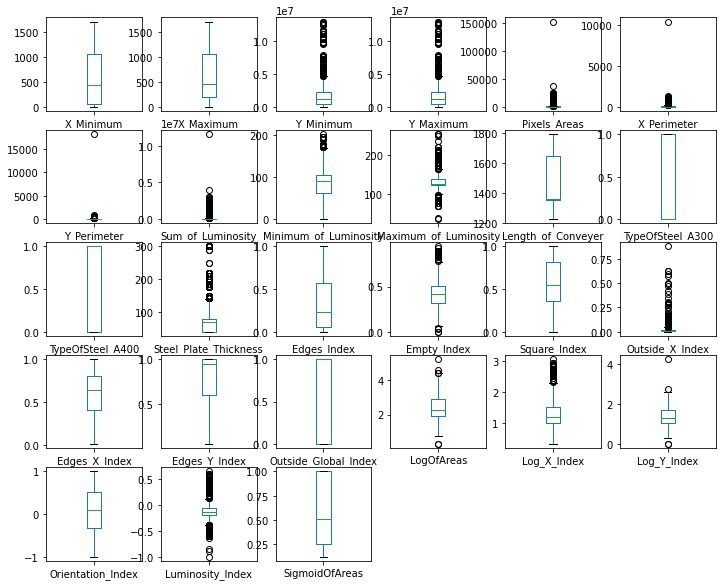

In [3]:
features = data.columns[:-7]
data[features].plot(kind='box',subplots=True,layout=(5,6),figsize=(12,10))
plt.show()

### Show Balance of Labels

<AxesSubplot:>

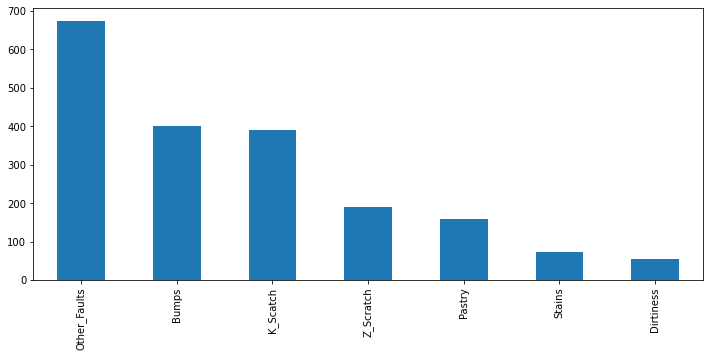

In [4]:
features = data.columns[:-7]
labels = data.columns[-7:]
X = data[features]
y = data[labels]
y.idxmax(axis=1).value_counts().plot(kind='bar',figsize=(12,5))

### Scale data, select features, and split into train and test dataset

Keras also has a validation option in the keras fit method with ''validation_split=0.2''.

In [18]:
# Scale data
s = MinMaxScaler()
data_s = s.fit_transform(data)
data_s = pd.DataFrame(data_s,columns=data.columns)

# Split data into X and y
features = data.columns[:-7]
labels = data.columns[-7:]
X = data_s[features]
y = data_s[labels]

# Train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,shuffle=True)

### Select Best Features

Select the best features for the classification.

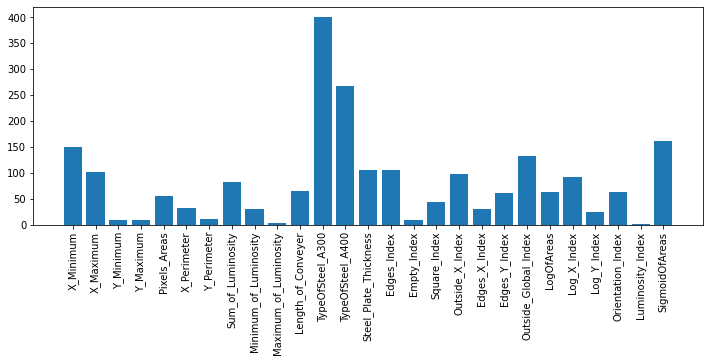

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
plt.figure(figsize=(12,4))
plt.bar(x=X.columns,height=fit.scores_,)
plt.xticks(rotation=90);

### Create a one-layer neural network in Keras
- 27 inputs -> [8 hidden nodes] -> 7 outputs
- Use categorical cross entropy as the loss metric
- Use 'softmax' activation in the final layer to return probabilities
- Utilize a validation split and plot the loss function to observe any evidence of overfitting


In [7]:
# Classification neural network with Keras
model = Sequential()
model.add(Dense(8, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dense(ytrain.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', \
              optimizer='adam', metrics=['accuracy'])

# Train model
result = model.fit(Xtrain,ytrain,epochs=1000,\
                   validation_split=0.2,verbose=0)

### Plot the Train and Validation Loss Functions

Generate the train and validation loss functions to determine number of epochs and evidence of overfitting.

Text(0.5, 0, 'Epoch')

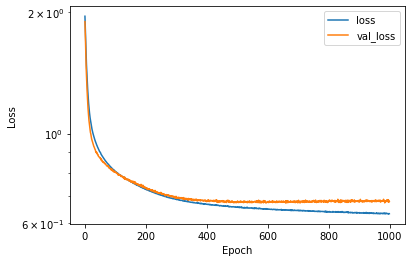

In [8]:
plt.semilogy(result.history['loss'],label='loss')
plt.semilogy(result.history['val_loss'],label='val_loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

**Discussion:** Look at the plots for loss. Do you see evidence of overfitting? How many epochs are needed for a good fit? Retrain the model with the proper number of epochs.

### Use test set to analyze model effectiveness

Generate predicted labels and probabilities of those labels.

In [9]:
# Make predictions and save in dataframe
yp = model.predict(Xtest)
yp = pd.DataFrame(yp,columns=ytest.columns)

# Extract predicted labels and probabilities
predicted_label = yp.idxmax(axis=1)
predicted_prob = yp.max(axis=1)
actual_label = ytest.idxmax(axis=1)

### Display probabilities

Display probabilities of faults with the most likely label highlighted and the actual label displayed.

In [10]:
yp['Actual fault'] = actual_label.values
yp.style.highlight_max(axis=1)

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Actual fault
0,0.000000,0.000000,0.999836,0.000000,0.000000,0.000003,0.000161,K_Scatch
1,0.000529,0.103786,0.001043,0.000000,0.000001,0.147680,0.746962,Bumps
2,0.002935,0.004090,0.131110,0.021715,0.000897,0.400981,0.438272,Other_Faults
3,0.000004,0.000019,0.913743,0.000771,0.000002,0.020255,0.065206,K_Scatch
4,0.000054,0.000001,0.976827,0.000140,0.000012,0.014819,0.008148,K_Scatch
5,0.267402,0.000091,0.001489,0.000000,0.001736,0.202321,0.526961,Bumps
6,0.000001,0.000004,0.000016,0.993981,0.000014,0.003539,0.002445,Stains
7,0.027572,0.000898,0.000024,0.000000,0.001830,0.546741,0.422934,Bumps
8,0.000002,0.033242,0.000000,0.000000,0.000048,0.024608,0.942101,Other_Faults
9,0.000000,0.000000,0.999858,0.000000,0.000000,0.000002,0.000140,K_Scatch


### Generate confusion matrix

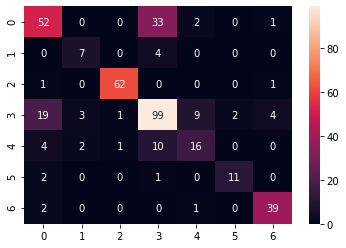

In [11]:
cm = confusion_matrix(predicted_label,actual_label)
sns.heatmap(cm,annot=True)
plt.savefig('confusion_matrix.png',dpi=600)
plt.show()

### Scikit-Learn Classifiers

Repeat analysis with 8 supervised learning methods. See [Classification Overview](https://apmonitor.com/pds/index.php/Main/ClassificationOverview) for additional information on supervised learning methods. 

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [21]:
from sklearn.multioutput import MultiOutputClassifier

### Create Models

In [22]:
ada = AdaBoostClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter=10000)
name  = ['Ada Boost','']
clist = [ada,lr,nb,knn,dt,rf,svc,mlp]
mlist = [None]*8

### Train Models

In [24]:
for i,model in enumerate(clist):
    mlist[i] = MultiOutputClassifier(model).fit(Xtrain,ytrain)

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\neural_network\_multi

### Create Confusion Matrices

In [27]:
for i,model in enumerate(mlist):
    print(model,model.score(Xtest,ytest))

MultiOutputClassifier(estimator=AdaBoostClassifier()) 0.5809768637532133
MultiOutputClassifier(estimator=LogisticRegression()) 0.4318766066838046
MultiOutputClassifier(estimator=GaussianNB()) 0.2133676092544987
MultiOutputClassifier(estimator=KNeighborsClassifier()) 0.6118251928020566
MultiOutputClassifier(estimator=DecisionTreeClassifier()) 0.5732647814910026
MultiOutputClassifier(estimator=RandomForestClassifier()) 0.6529562982005142
MultiOutputClassifier(estimator=SVC()) 0.5475578406169666
MultiOutputClassifier(estimator=MLPClassifier(max_iter=300)) 0.6169665809768637
